In [17]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import requests
import matplotlib.dates as md

dep = '75'

CSV_URL = 'https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=';')
    my_list = list(cr)
print(my_list[:5])
data_all = [(elt[0],elt[1],int(elt[2]),int(elt[3])) for elt in my_list[1:]]
data = []
for k,elt in enumerate(data_all):
    if k == 0:
        previous_date = elt[1]
    new_date = elt[1]
    if new_date != previous_date:
        data.append(last_data)
    if k == len(data_all):
        data.append(elt)
    previous_date = elt[1]
    last_data = elt

print(last_data)
positif = [elt[2] for elt in data if elt[0]==dep]
tested = [elt[3] for elt in data if elt[0]==dep]
print(len(tested),'jours pour le département',dep,"jusqu'au",last_data[1])
ratio = [elt[0]/elt[1] for elt in zip(positif,tested) if elt[1]>1]
#rc('mathtext', default='regular')


[['dep', 'jour', 'P', 'T', 'cl_age90', 'pop'], ['01', '2020-05-13', '0', '16', '09', '83001'], ['01', '2020-05-13', '1', '17', '19', '84665'], ['01', '2020-05-13', '0', '34', '29', '65496'], ['01', '2020-05-13', '1', '72', '39', '85588']]
('978', '2021-12-27', 101, 665)
594 jours pour le département 75 jusqu'au 2021-12-27


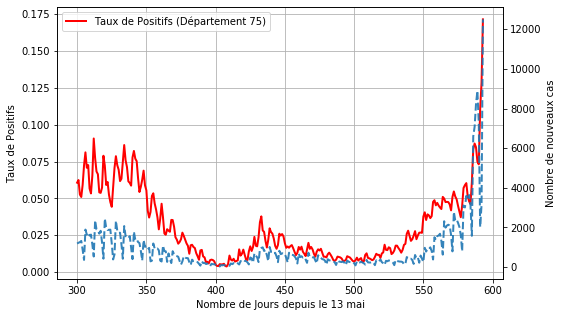

In [14]:

x = range(len(positif))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(x[300:], ratio[300:], '-r',linewidth=2.0, label = 'Taux de Positifs (Département '+dep+')')

ax2 = ax.twinx()
ax2.plot(x[300:], positif[300:], '--',linewidth=2.0,alpha=0.9, label = 'Nombre de nouveaux cas')
ax.grid()
ax.set_xlabel("Nombre de Jours depuis le 13 mai")
ax.set_ylabel(r"Taux de Positifs")
ax2.set_ylabel(r"Nombre de nouveaux cas")
ax.legend()
plt.savefig(dep+'.png')

[['dep', 'sexe', 'jour', 'hosp', 'rea', 'HospConv', 'SSR_USLD', 'autres', 'rad', 'dc'], ['01', '0', '2020-03-18', '2', '0', 'NA', 'NA', 'NA', '1', '0'], ['01', '1', '2020-03-18', '1', '0', 'NA', 'NA', 'NA', '1', '0'], ['01', '2', '2020-03-18', '1', '0', 'NA', 'NA', 'NA', '0', '0'], ['02', '0', '2020-03-18', '41', '10', 'NA', 'NA', 'NA', '18', '11']]
['976', '1', '2021-12-30', '5', '2', '3', '0', '0', '599', '84']
653 jours pour le département 75 depuis le 2020-03-18 jusq'au 2021-12-30
191 réanimations aujourd'hui contre 188 hier
852 hospitalisations aujourd'hui contre 797 hier


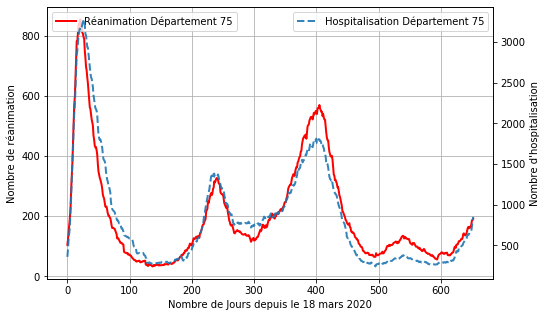

In [21]:

CSV_URL = 'https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7'
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=';')
    my_list = list(cr)
print(my_list[:5])
print(my_list[-4])
data = [(elt[0],elt[2],int(elt[3]),int(elt[4])) for elt in my_list[1:] if elt[1] == '0']
lastdate = data[:-1][:-1][-1][1]
hosp = [elt[2] for elt in data if elt[0]==dep]
rea = [elt[3] for elt in data if elt[0]==dep]
if len(rea) == len(hosp):
    print(len(hosp),'jours pour le département',dep,'depuis le',data[0][1],"jusq'au",lastdate)

x = range(len(hosp))
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
start = 0
ax.plot(x[start:], rea[start:], '-r',linewidth=2.0, label = 'Réanimation Département '+dep)
ax2 = ax.twinx()
ax2.plot(x[start:], hosp[start:], '--',linewidth=2.0,alpha=0.9, label = 'Hospitalisation Département '+dep)
ax.grid()
ax.set_xlabel("Nombre de Jours depuis le 18 mars 2020")
ax.set_ylabel(r"Nombre de réanimation")
ax2.set_ylabel(r"Nombre d'hospitalisation")
ax.legend(loc=2)
ax2.legend(loc=0)

plt.savefig(dep+'.png')
print(rea[-1],"réanimations aujourd'hui contre",rea[-2],"hier")
print(hosp[-1],"hospitalisations aujourd'hui contre",hosp[-2],"hier")

Text(0.5, 1.0, 'Evolution du nombre de réa ces 30 derniers jours')

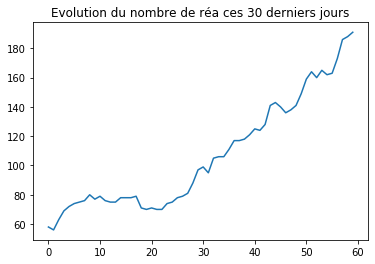

In [16]:

plt.plot(rea[len(rea)-60:])
plt.title("Evolution du nombre de réa ces 30 derniers jours")